In [24]:
import cv2
import matplotlib.pyplot as plt

In [25]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [26]:
classLabels = []
file_name = 'Labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')-

In [41]:
model.setInputSize(320, 320)
model.setInputScale(1.0 / 255)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000024318FB4610>

In [42]:
def detect_objects(image):
    ClassIndex, confidence, bbox = model.detect(image, confThreshold=0.55, nmsThreshold=0.4)
    return ClassIndex, confidence, bbox

In [43]:
img = cv2.imread('insta.mp4')
img = cv2.imread('person.jpg')
ClassIndex, confidence, bbox = detect_objects(img)

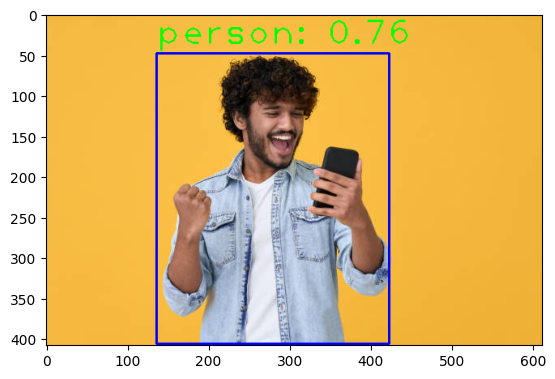

In [44]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    if ClassInd <= len(classLabels):
        cv2.rectangle(img, boxes, (255, 0, 0), 2)
        cv2.putText(img, f"{classLabels[ClassInd-1]}: {conf:.2f}", (boxes[0], boxes[1] - 10), font, font_scale, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [45]:
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam video")

font_scale = 2
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    ClassIndex, confidence, bbox = detect_objects(frame)
    
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= len(classLabels):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, f"{classLabels[ClassInd-1]}: {conf:.2f}", (boxes[0], boxes[1] - 10), font, font_scale, (0, 255, 0), 2)

    cv2.imshow('Object Detection', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()